# Programming for Data Analysis

## Project 2019

The following project consists of generating a dataset using numpy.random package, with the following steps.

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables

* Investigate the types of variables involved, their likely distributions, and their relationships with each other.

* Synthesise/simulate a data set as closely matching their properties as possible

* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

I have an interest in Irish players playing in the English Soccer leagues, therfore I have chosen to base my data set around this phenomenon. Variables including Name, Surname, Age, County of Ireland, Playing Position and League in wich they play. I have used a number of sources for my data and these will be listed in each variable section. 

In [1]:
# To begin with we add in all the packages we intend to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

As part of this project a number of external soucres of data are required and these datasets are stored in a subfolder within this repositiory. 

### Name

The first variable chosen was the first name of the player. This variable was taken from the CSO website "the Top baby boys names 2014". Althoughthe source of the data may not be the most current the satisitcal calculations to follow hold though. The data was stored in a CSV file and stored in the data folder under the name formanes

In [2]:
df_fornames = pd.read_csv("data/fornames.csv")

In [3]:
df_fornames.head()

,Name,Qty,Percentage
0,Jack,786,0.055705
1,James,695,0.049256
2,Daniel,638,0.045216
3,Conor,581,0.041176
4,Seán,526,0.037279


The dataset has 3 number columns - Name, Qty and Percentage. This information can be used to randomly generate a boys name using the probility and the variable name. For this we used the 

**numpy.random.choice(a, size=None, replace=True, p=None)**

In [4]:
#First from the df_fornames we define the name array
forname_array = df_fornames["Name"].tolist()
# We then define the pobility of these names arrising
forname_percent = df_fornames["Percentage"].tolist()

forname = np.random.choice(forname_array, 1, p=forname_percent)
print(forname)

['Darragh']


https://www.cso.ie/en/releasesandpublications/ep/p-1916/1916irl/people/names/

### Surname

Simialrly to above, the surname follows the same sequence as the forname. The independat.ie reveiled the top 20 Irish surnames in December 2019. We then assumed these to be the surename variables. This data was also stored as a CSV file and stored in data folder.

In [5]:
df_surenames = pd.read_csv("data/surname.csv")

In [6]:
df_surenames.head()

,Surname
0,Murphy
1,Kelly
2,Byrne
3,Ryan
4,O'Brien


For this variable we have no quanitiy or percentage breakdown - therefore we give them all equal likelyhood of accurance 1/20.

In [7]:
surname = df_surenames["Surname"]
S_name = surname[int(np.random.choice(19,1))]
print(S_name)

Brennan


https://www.independent.ie/irish-news/revealed-top-20-irish-surnames-31414892.html

### Age

The age variable was taken as another asumption ages 15 through to 33 with a triangle distribution. We have assumed youngsters start to head to England at the age of 15 and it peaks at 18 and gradualy tapers down to the age of 33, where we assumed the carrer of a professional footballer ends. The thought process behind this is that at a young ages players are scouted by teams and then given short-term contracts and then over time with injurys and not been given contract extensions the probibility decreases with age. This assumed distribution takes the form of:

**numpy.random.triangular(left, mode, right, size=None)**

In [8]:
# the left most age is 15, mode/average is 18 and the right is 33
age = np.random.triangular(15, 18, 33, 1)

In [9]:
print(age)

[20.72157282]


### County

As before for the county of origin of each of the players we decided to base this on the probibilty/likelhood of coming from each county from population. Wikepdia has taken data from the CSO census of 2016 for the entire island of Ireland. This data was taken and stored in a CSV file in the data folder. The CSV file contains 3 number columns County, Population and Province. We can use the population data to determine the likelyhood of the county of origin of each of the players. Further calculations are required.

In [10]:
df_county = pd.read_csv("data/population_per_county.csv")

In [11]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
County        32 non-null object
Population    32 non-null float64
Province      32 non-null object
dtypes: float64(1), object(2)
memory usage: 848.0+ bytes


In [12]:
df_county.head()

,County,Population,Province
0,Dublin,1347359.0,Leinster
1,Antrim,618108.0,Ulster
2,Cork,542868.0,Munster
3,Down,531665.0,Ulster
4,Galway,258058.0,Connacht


In order to determine the probibility breakdown per county we need to total the population column. Totaled below - 6,573,732 people. We can then determine the percentage probibility breakdown per county.

In [13]:
pop = df_county['Population'].sum()
print(pop)
df_county['propibility'] = df_county['Population'] / pop

6573732.0


In [14]:
df_county.head()

,County,Population,Province,propibility
0,Dublin,1347359.0,Leinster,0.204961
1,Antrim,618108.0,Ulster,0.094027
2,Cork,542868.0,Munster,0.082581
3,Down,531665.0,Ulster,0.080877
4,Galway,258058.0,Connacht,0.039256


As previous variables we use the choice function to randomly choose a county for the player to come from.

In [15]:
county_array = df_county["County"].tolist()
county_percent = df_county["propibility"].tolist()

county1 = np.random.choice(county_array, 1, p=county_percent)
county = str(county1)

print(county)

['Dublin']


https://en.wikipedia.org/wiki/List_of_Irish_counties_by_population

### Position

The position of the player is a slightly more straight forward calculation. Here we look a basic team formation of 1 Goalkepper (GK), 4 Defenders (DF), 4 Midfielders (MD) and 2 Forwards (FW). From this we can calculate the probibility of each psositon accuring. As an example the goalkeeper will accure 1 in ever 11 players on the pitch. For the position variable we randomly select a position for the player using the numpy.random.choice function as the previous variables.  

In [16]:
# GK = 1/11  0.09
# DF = 4/11  0.36
# MD = 4/11  0.36
# FW = 2/11  0.19

position = ['GK', 'DF', 'MD', 'FW']
pos_prob = [0.09, 0.36, 0.36, 0.19]

pos = np.random.choice(position, 1, p=pos_prob)
print(pos)

['MD']


### League

We can now determine which league the player plays in angain using the choice function in numpy.random. Soccerway.com has a full database of all players playing in any league in the world. This database can be filtered to determine all the Irish players playing in each league. This information is then stored in a CSV file named leagues in the data folder. This CSV gives a full list of all the current players the league and club they play for.

In [17]:
df_leagues = pd.read_csv("data/leagues.csv")

In [18]:
df_leagues.head()

,Player,League,Club
0,K. Long,Premier League,Burnley
1,C. Kelleher,Premier League,Liverpool
2,L. Richards,Premier League,Wolverhampton Wanderers
3,G. Kilkenny,Premier League,AFC Bournemouth
4,S. Coleman,Premier League,Everton


In [19]:
# Number of players in the list!
df_leagues.count()

Player    212
League    212
Club      212
dtype: int64

In [20]:
df_leagues.League.unique()

array(['Premier League', 'Championship', 'League One', 'League Two',
       'National League', 'National League N/S', 'Non League Premier',
       'Non League Div One'], dtype=object)

The next step is to determine the probility and name of the league the players are listed in. This column in the CSV file is labeled "League".

In [21]:
# Define a sub-table "LeaguesAndProb" - Leagues and probility
LeaguesAndProb= df_leagues['League'].value_counts(normalize=True)
league_prob = LeaguesAndProb.values
league_name = LeaguesAndProb.index

league = np.random.choice(league_name, 1, p=league_prob)
print(LeaguesAndProb)
print("\n \nThe randomly generated league selected is: ")
print(league)

League One             0.198113
League Two             0.183962
Championship           0.169811
Premier League         0.127358
National League        0.117925
National League N/S    0.099057
Non League Premier     0.066038
Non League Div One     0.037736
Name: League, dtype: float64

 
The randomly generated league selected is: 
['Championship']


https://ie.soccerway.com/players/players_abroad/ireland-republic/

### Final Data Point

We can now create a new data frame using all the above varibales and the numpy.random functions.

In [22]:
# Define the dataframe and incude all the column names
df_rand_players = pd.DataFrame(columns=['Forname','Surname','County','Age','Position','League'])

In [23]:
# Include all the additonal CSV files that do not carry over from the above code.
surname = df_surenames["Surname"]

# We can now loop trough a qunatity of players to generate in this case we can select 1000

for i in range(212):
    
    # Firstly we declare all the varibales and 
    name = np.random.choice(forname_array, 1, p=forname_percent)
    player_surname = surname[int(np.random.choice(19,1))]
    county = np.random.choice(county_array, 1, p=county_percent)
    age = np.random.triangular(16, 18, 33, 1)
    pos = np.random.choice(position, 1, p=[0.09, 0.36, 0.36, 0.19])
    league = np.random.choice(league_name, 1, p=league_prob)
    
    # We can now append all the players into the datafrome, one after the next populating all the columns.
    
    df_rand_players = df_rand_players.append({'Forname': name[0],
                                           'Surname': player_surname,
                                           'County': county[0],
                                           'Age': round(age[0],2),
                                           'Position': pos[0],
                                           'League': league[0]}, ignore_index=True)

In [24]:
df_rand_players.head()

,Forname,Surname,County,Age,Position,League
0,Luke,O'Reilly,Donegal,19.25,DF,Championship
1,Conor,McDonagh,Dublin,21.02,MD,Non League Premier
2,Finn,O'Neill,Dublin,21.64,MD,Premier League
3,Daniel,O'Connor,Cork,18.63,DF,League Two
4,Alexander,Murphy,Dublin,19.99,DF,Premier League


We can now introduce an additonal column based on other columns in the dataframe. In this project we will look at the number of Irish caps a player has recieved. This is based on the leaugue in which they play along with their age. If a player plays in the Premier league and is above a certain age they are more likely to have played for the Irish National Team as the leagues decrese and their age, so to does the likelyhood of involvment. The following snippet of code will add randon number of caps per player based on age and league.

In [25]:
if "Irish_Caps" not in df_rand_players:
    df_rand_players["Irish_Caps"] = ""

for index, row in df_rand_players.iterrows():
    age = row['Age']
    league = row['League']
    cap = float()
    if age < 20 and league=='Premier League':
        cap = float(np.random.randint(1, 10, 1))
    elif age >= 20 and league=='Premier League':
        cap = float(np.random.randint(1, 25, 1))
    elif age >= 28 and league=='Premier League':
        cap = float(np.random.randint(1, 40, 1))
    elif age >= 20 and league=='Championship':
        cap = float(np.random.randint(0, 2, 1))
    elif age >= 20 and league=='Championship':
        cap = float(np.random.randint(0, 5, 1))
    df_rand_players.at[index, 'Irish_Caps'] = cap


In [26]:
df_rand_players.head()

,Forname,Surname,County,Age,Position,League,Irish_Caps
0,Luke,O'Reilly,Donegal,19.25,DF,Championship,0
1,Conor,McDonagh,Dublin,21.02,MD,Non League Premier,0
2,Finn,O'Neill,Dublin,21.64,MD,Premier League,1
3,Daniel,O'Connor,Cork,18.63,DF,League Two,0
4,Alexander,Murphy,Dublin,19.99,DF,Premier League,2


In [27]:
# We now deine the Irish team based on more than one cap for Ireland
irish_players = df_rand_players[df_rand_players['Irish_Caps']>0]
irish_players.head()

,Forname,Surname,County,Age,Position,League,Irish_Caps
2,Finn,O'Neill,Dublin,21.64,MD,Premier League,1
4,Alexander,Murphy,Dublin,19.99,DF,Premier League,2
10,Adam,O'Brien,Londonderry,20.68,DF,Premier League,9
14,Kyle,Fitzgerald,Galway,29.37,FW,Premier League,21
18,Jake,O'Connor,Kildare,20.67,DF,Championship,1


The df_rand_players dataframe was generated using the numpy.random package and a number of its functions. This dataframe was made up of 7 columns - Name, Suranme, County, Age, Position, League and Irish Caps. We can now review the dataframe to ensure it has the carictorisitics we assumed.

## Analysis

We can now review the randomly generated dataset and compare it against the above criteria.

#### Forname

The following section of code will compare the original forname percentage breakdown versus the randomly generated forenames percentage breakdown dataset. From the randomly generated range of values (212 number) the percentage breakdown is listed in the table. The Percentage_x is the original CSV file listed while the Percentage_y is the randomly generated data above using the choice function.

In [40]:
# Define the randonly generated players forename and the percetnage breakdown
rough_work_Forename = (df_rand_players['Forname'].value_counts(normalize=True))
# Convert the above series into a datframe
check_forname = pd.DataFrame({'Name':rough_work_Forename.index, 'Percentage':rough_work_Forename.values})
# Now we merge the Original Forenames percentage and the randomly generated percentage
firstname_compare = df_fornames.merge(check_forname, how='outer', left_on='Name', right_on='Name')
# We now calcualte the percentage difference
firstname_compare['Difference'] = round(firstname_compare['Percentage_x'] - firstname_compare['Percentage_y'],3)
print(firstname_compare)

         Name  Qty  Percentage_x  Percentage_y  Difference
0        Jack  786      0.055705      0.056604      -0.001
1       James  695      0.049256      0.051887      -0.003
2      Daniel  638      0.045216      0.056604      -0.011
3       Conor  581      0.041176      0.028302       0.013
4        Seán  526      0.037279      0.014151       0.023
5        Adam  493      0.034940      0.014151       0.021
6        Luke  437      0.030971      0.047170      -0.016
7        Noah  434      0.030758      0.037736      -0.007
8       Harry  398      0.028207      0.018868       0.009
9     Charlie  389      0.027569      0.028302      -0.001
10      Dylan  384      0.027215      0.014151       0.013
11       Alex  383      0.027144      0.018868       0.008
12      Oisin  381      0.027002      0.042453      -0.015
13    Michael  379      0.026860      0.028302      -0.001
14       Liam  378      0.026790      0.042453      -0.016
15       Ryan  373      0.026435      0.018868       0.0

From the above table we can gain insights into the differences in the data.

In [41]:
first_average = firstname_compare['Difference'].mean()
first_max = firstname_compare['Difference'].max()
first_min = firstname_compare['Difference'].min()
rand_total = firstname_compare['Percentage_y'].sum()
print("Max difference:" + str(first_max) + "\n" + "Min Difference:" + str(first_min) + "\n" + "Mean Difference:" + str(round(first_average,5)) + "\n" + "Random Total:" + str(round(rand_total,5)) + "\n")

Max difference:0.023
Min Difference:-0.017
Mean Difference:7e-05
Random Total:1.0



The mean difference in the percentage difference is negligable of 0.005%. The Max difference is 0.023 or 2.3% for the name Sean - the expected value 0.037279 (3.72%) while the randomly generated percentage 0.014151 (1.41%) under half the expected value. The oposite is correct for the min value Cian 0.025585 (2.55%) is expected while the random generated values are 0.042453 (4.24%).

#### Surname

Shown below, The expected value for all the surnames percentage breakdown is 0.05 or 5%. For the randomly generated dataset the most common surname listed is Fitzgerald at 7.54% and the least common is 2.35% McDonagh.

In [30]:
check_Surname = (df_rand_players['Surname'].value_counts(normalize=True))
print(check_Surname)

Fitzgerald    0.075472
O'Connor      0.070755
Lynch         0.066038
O'Neill       0.066038
Kavanagh      0.066038
Murphy        0.061321
Brennan       0.061321
Daly          0.061321
O'Reilly      0.061321
McCarthy      0.051887
O'Brien       0.051887
Ryan          0.047170
Walsh         0.047170
O'Sullivan    0.042453
Byrne         0.042453
Dunne         0.037736
Kelly         0.033019
Doyle         0.033019
McDonagh      0.023585
Name: Surname, dtype: float64


#### Age

C:\Users\eogha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


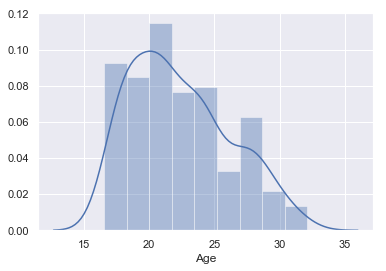

In [31]:
check_age = df_rand_players['Age']
sns.distplot(check_age, color="b",)

In [32]:
#df_rand_players.to_csv(r'generated_players.csv', index = None, header=True)

#### County

In [33]:
rough_work_County = (df_rand_players['County'].value_counts(normalize=True))
check_County = pd.DataFrame({'County':rough_work_County.index, 'RandGen Percentage':rough_work_County.values})

county_compare = df_county.merge(check_County, how='outer', left_on='County', right_on='County')

county_compare['Difference'] = round(county_compare['propibility'] - county_compare['RandGen Percentage'],3)

print(county_compare[['County', 'Population', 'propibility', 'RandGen Percentage', 'Difference']])

         County  Population  propibility  RandGen Percentage  Difference
0        Dublin   1347359.0     0.204961            0.198113       0.007
1        Antrim    618108.0     0.094027            0.113208      -0.019
2          Cork    542868.0     0.082581            0.056604       0.026
3          Down    531665.0     0.080877            0.084906      -0.004
4        Galway    258058.0     0.039256            0.051887      -0.013
5   Londonderry    247132.0     0.037594            0.037736      -0.000
6       Kildare    222504.0     0.033847            0.037736      -0.004
7         Meath    195044.0     0.029670            0.023585       0.006
8      Limerick    194899.0     0.029648            0.018868       0.011
9        Tyrone    179000.0     0.027230            0.033019      -0.006
10       Armagh    174792.0     0.026589            0.037736      -0.011
11    Tipperary    159553.0     0.024271            0.018868       0.005
12      Donegal    159192.0     0.024216           

In [34]:
county_average = county_compare['Difference'].mean()
county_max = county_compare['Difference'].max()
county_min = county_compare['Difference'].min()
print("Max difference:" + str(county_max) + "\n" + "Min Difference:" + str(county_min) + "\n" + "Mean Difference:" + str(round(county_average,5)) + "\n")

Max difference:0.026
Min Difference:-0.019
Mean Difference:-0.00053



#### Position

In [35]:
# GK = 1/11  0.09
# DF = 4/11  0.36
# MD = 4/11  0.36
# FW = 2/11  0.19

rand_position = df_rand_players['Position'].value_counts(normalize=True)
print(rand_position)

DF    0.405660
MD    0.306604
FW    0.174528
GK    0.113208
Name: Position, dtype: float64


#### League

In [36]:
rand_League = df_rand_players['League'].value_counts(normalize=True)
print("**** Random Generated Probibility **** \n")
print(rand_League)
print("\n \n **** Original Probibility ****\n")
print(LeaguesAndProb)

**** Random Generated Probibility **** 

League Two             0.216981
Championship           0.212264
League One             0.198113
Premier League         0.122642
National League        0.099057
Non League Premier     0.061321
National League N/S    0.047170
Non League Div One     0.042453
Name: League, dtype: float64

 
 **** Original Probibility ****

League One             0.198113
League Two             0.183962
Championship           0.169811
Premier League         0.127358
National League        0.117925
National League N/S    0.099057
Non League Premier     0.066038
Non League Div One     0.037736
Name: League, dtype: float64


#### Caps

In [37]:
irish_capped_players = df_rand_players[df_rand_players.Irish_Caps > 0]
 
print(irish_capped_players)

       Forname     Surname       County    Age Position          League  \
2         Finn     O'Neill       Dublin  21.64       MD  Premier League   
4    Alexander      Murphy       Dublin  19.99       DF  Premier League   
10        Adam     O'Brien  Londonderry  20.68       DF  Premier League   
14        Kyle  Fitzgerald       Galway  29.37       FW  Premier League   
18        Jake    O'Connor      Kildare  20.67       DF    Championship   
25        Luke  O'Sullivan       Antrim  20.62       MD  Premier League   
29        Noah    O'Reilly         Mayo  25.38       MD  Premier League   
31       Dylan       Kelly       Dublin  23.80       DF    Championship   
34        Alex        Daly       Dublin  24.74       DF    Championship   
38     Cillian    O'Connor       Galway  28.44       DF    Championship   
47        Luke       Lynch       Tyrone  22.43       FW    Championship   
50        Finn      Murphy     Longford  18.27       MD  Premier League   
56       David     O'Brie

In [38]:
champ_plus20 = irish_capped_players[(irish_capped_players['Age'] >= 20) & ((irish_capped_players['League'] == 'Championship'))]['Irish_Caps'].mean()
champ_sub20 = irish_capped_players[(irish_capped_players['Age'] < 20) & ((irish_capped_players['League'] == 'Championship'))]['Irish_Caps'].mean()

prem_sub20 = irish_capped_players[(irish_capped_players['Age'] < 20) & ((irish_capped_players['League'] == 'Premier League'))]['Irish_Caps'].mean()
prem_plus20 = irish_capped_players[(irish_capped_players['Age'] >= 20) & ((irish_capped_players['League'] == 'Premier League'))]['Irish_Caps'].mean()
print("Average number of Caps for a player below twenty, playing in the Premier League:" + str(round(prem_sub20,2)))
print("Average number of Caps for a player above twenty, playing in the Premier League:" + str(round(prem_plus20)))
print("Average number of Caps for a player below twenty, playing in the Championship: " + str(champ_sub20))
print("Average number of Caps for a player above twenty, playing in the Championship:" + str(round(champ_plus20)))

Average number of Caps for a player below twenty, playing in the Premier League:4.0
Average number of Caps for a player above twenty, playing in the Premier League:14.0
Average number of Caps for a player below twenty, playing in the Championship: nan
Average number of Caps for a player above twenty, playing in the Championship:1.0


# Conclusion